Сформировать таргет

КАК!??!?!?!?!?

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir("../task_3")

['eda_task3.ipynb',
 '.DS_Store',
 'Задача3. Датасет 1. Тренировочный.csv',
 'README.md',
 'Задача3. Датасет 2. Тестовый.csv']

In [5]:
data_1 = pd.read_csv("Задача3. Датасет 1. Тренировочный.csv", encoding="cp1251", sep=';')
data_2 = pd.read_csv("Задача3. Датасет 2. Тестовый.csv", encoding="cp1251", sep=';')

In [6]:
data_1

,Параметр,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х062,х063,х064,х065,х066,х067,х068,х069,х070,х071
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01.01.2019,190.355,3.8,50.008,49.986,3000.544,49.984,57.3,57.9,59.6,...,66.3,77.0,70.2,67.2,72.4,59.1,37.2,39.9,36.4,9.0
3,01.01.2019 0:01,190.355,3.7,50.021,49.999,3001.179,49.997,57.4,58.0,59.7,...,66.3,77.0,70.2,67.2,72.4,59.1,37.2,39.9,36.4,9.0
4,01.01.2019 0:02,190.355,3.7,50.030,50.009,3001.672,50.006,57.5,58.2,59.9,...,66.3,77.0,70.2,67.2,72.4,59.1,37.1,39.9,36.4,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179481,19.06.2019 4:29,190.054,24.4,50.020,49.999,3000.568,50.001,74.9,60.3,62.4,...,63.0,73.3,70.8,68.1,68.8,3200.0,37.9,40.6,42.7,26.7
179482,19.06.2019 4:30,190.054,24.4,50.012,49.994,3000.571,49.996,73.5,60.3,62.4,...,63.0,73.3,70.8,68.1,68.8,3200.0,37.9,40.6,42.7,26.7
179483,19.06.2019 4:31,190.054,24.4,49.991,49.971,2999.358,49.971,74.0,60.2,62.4,...,63.0,73.3,70.8,68.1,68.8,3200.0,37.9,40.6,42.7,26.7
179484,19.06.2019 4:32,190.054,24.4,49.991,49.971,2998.938,49.968,75.0,60.3,62.4,...,63.0,73.3,70.8,68.1,68.8,3200.0,37.9,40.6,42.7,26.7


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179486 entries, 0 to 179485
Data columns (total 72 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Параметр  179484 non-null  object 
 1   х001      179484 non-null  float64
 2   х002      179484 non-null  float64
 3   х003      179484 non-null  float64
 4   х004      179484 non-null  float64
 5   х005      179484 non-null  float64
 6   х006      179484 non-null  float64
 7   х007      179484 non-null  float64
 8   х008      179484 non-null  float64
 9   х009      179484 non-null  float64
 10  х010      179484 non-null  float64
 11  х011      179484 non-null  float64
 12  х012      179484 non-null  float64
 13  х013      179484 non-null  float64
 14  х014      179484 non-null  float64
 15  х015      179483 non-null  float64
 16  х016      179484 non-null  float64
 17  х017      179484 non-null  float64
 18  х018      179484 non-null  float64
 19  х019      179484 non-null  float64
 20  х020

In [9]:
data_2

,Unnamed: 0,х001,х002,х003,х004,х005,х006,х007,х008,х009,...,х062,х063,х064,х065,х066,х067,х068,х069,х070,х071
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01.09.2019,189.346,22.1,50.030,50.009,3002.125,50.008,69.1,61.7,63.4,...,62.1,72.3,71.3,68.5,68.7,3276.7,39.1,41.9,42.7,25.2
3,01.09.2019 0:01,189.346,22.1,50.014,49.995,3000.567,49.996,69.8,61.5,63.2,...,62.1,72.3,71.3,68.5,68.8,3276.7,39.0,41.9,42.7,25.2
4,01.09.2019 0:02,189.346,22.1,50.032,50.011,3002.355,50.010,69.3,61.5,63.2,...,62.1,72.3,71.3,68.5,68.8,3276.7,39.1,41.9,42.7,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6870,05.09.2019 18:28,190.401,23.9,50.025,50.006,3001.563,50.003,67.3,62.4,64.1,...,63.3,72.2,72.4,69.7,69.8,3276.7,40.7,43.5,44.7,27.0
6871,05.09.2019 18:29,190.401,23.9,50.019,49.999,3000.999,50.000,73.8,62.5,64.2,...,63.3,72.2,72.4,69.6,69.7,3276.7,40.7,43.5,44.7,27.0
6872,05.09.2019 18:30,190.401,23.9,50.034,50.013,3001.733,50.013,74.6,62.5,64.3,...,63.3,72.3,72.4,69.6,69.8,3276.7,40.7,43.5,44.7,27.0
6873,05.09.2019 18:31,190.401,23.9,50.031,50.011,3001.939,50.011,74.7,62.3,64.1,...,63.3,72.2,72.4,69.6,66.4,3276.7,40.7,43.5,44.7,27.0


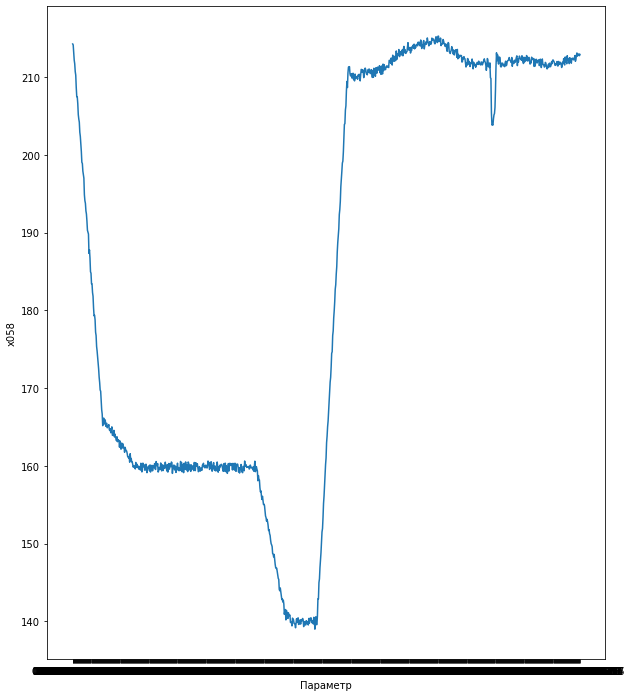

In [17]:
plt.figure(figsize=(10, 12))
sns.lineplot(data=data_1[:1000], x="Параметр", y="х058")
sns.lineplot(data=data_2, x="Параметр", y="х058")

In [15]:
data_1.columns[0]

'Параметр'